In [1]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read in data and display fist 5 rows
df = pd.read_csv('TIME SERIES + TRIPADVISORS + VISITOR ATTENTION INDEX - DATA COMPOSITION 2 (80-10-10).csv')
df.head(5)

,Monthly,Tourist Arrival,Number of Posts,Number of Comments,Airbnb Vietnam,Vietnam restaurant,Shopping in Hanoi,Shopping in Ho Chi Minh,Vietnam tour,Skyscanner,...,Hoi An,Vietnam weather,Visa for Vietnam,Sgn airport,Phu Quoc,Vietnam itinerary,Vietnam trip,Things to do in Hue,Vietnam backpackers,Class
0,01/01/2008,399556,403,3049,11,59,32,8,58,7,...,27,58,29,18,20,0,32,0,8,Train
1,01/02/2008,411032,357,3211,0,51,0,0,46,6,...,27,58,31,10,19,5,39,7,5,Train
2,01/03/2008,414332,344,3153,0,57,7,24,58,6,...,27,50,29,38,28,6,30,0,0,Train
3,01/04/2008,395900,338,3184,0,51,6,9,58,6,...,27,41,30,25,22,8,45,0,8,Train
4,01/05/2008,366387,369,2964,0,57,0,7,57,6,...,27,44,24,16,22,5,47,0,9,Train


In [3]:
import datetime
df['Monthly'] = pd.to_datetime(df['Monthly'])
df['Monthly'] = df['Monthly'].dt.strftime('%d.%m.%Y')
df['Monthly'] = pd.DatetimeIndex(df['Monthly']).dayofyear

In [4]:
X=df.drop('Tourist Arrival', axis=1)
y=df['Tourist Arrival']

In [5]:
train = df[df["Class"] == "Train"]
validation = df[df["Class"] == "Validation"]
test = df[df["Class"] == "Test"]
print(train.shape)
print(validation.shape)
print(test.shape)

(148, 24)
(19, 24)
(19, 24)


In [6]:
train = train.drop(['Class'], axis=1)
validation = validation.drop(['Class'], axis=1)
test = test.drop(['Class'], axis=1)

In [7]:
target_column_train = ['Tourist Arrival']
predictors_train = list(set(list(train.columns))-set(target_column_train))

X_train = train[predictors_train].values
y_train = train[target_column_train].values

print(X_train.shape)
print(y_train.shape)

(148, 22)
(148, 1)


In [8]:
target_column_validation = ['Tourist Arrival'] 
predictors_validation = list(set(list(validation.columns))-set(target_column_validation))

X_validation = validation[predictors_validation].values
y_validation = validation[target_column_validation].values

print(X_validation.shape)
print(y_validation.shape)

(19, 22)
(19, 1)


In [9]:
target_column_test = ['Tourist Arrival'] 
predictors_test = list(set(list(test.columns))-set(target_column_test))

X_test = test[predictors_test].values
y_test = test[target_column_test].values

print(X_test.shape)
print(y_test.shape)

(19, 22)
(19, 1)


In [10]:
from sklearn import model_selection
from sklearn.svm import SVR
from sklearn import svm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
import statistics
from scipy import stats
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error

In [11]:
svr_rbf = SVR(kernel='sigmoid', C=10, epsilon=0.05)
svr_rbf.fit(X_train, y_train) 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=10, epsilon=0.05, kernel='sigmoid')

In [12]:
params = {'C':[0.1, 1, 10, 100, 1000],
          'epsilon':[1, 0.1, 0.001, 0.0001, 0.00001]}

In [13]:
grid = GridSearchCV(svr_rbf,param_grid=params,cv=5,scoring='r2',verbose=1,return_train_score=True)


In [14]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

GridSearchCV(cv=5, estimator=SVR(C=10, epsilon=0.05, kernel='sigmoid'),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [1, 0.1, 0.001, 0.0001, 1e-05]},
             return_train_score=True, scoring='r2', verbose=1)

In [15]:
grid.best_estimator_

SVR(C=0.1, epsilon=1, kernel='sigmoid')

In [16]:
svr_best=SVR(kernel='sigmoid', C=0.1, epsilon=1)
svr_best.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=0.1, epsilon=1, kernel='sigmoid')

In [17]:
svr_best.score(X_validation,y_validation)


-47669859.783323884

In [18]:
y_pred=svr_best.predict(X_test)
print(y_pred)

[616707.66350743 616707.73059685 616707.81360757 616708.01357395
 616708.36133181 616708.49486372 616708.38138155 616708.5589184
 616708.66164624 616708.67871326 616708.87977468 616708.91720707
 616708.82424734 616708.95832671 616708.94529459 616708.98911505
 616708.87760146 616708.76012753 616708.68427396]


In [19]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", RMSE)

Root Mean Squared Error: 395190.5334070066


In [20]:
MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 348922.6376913626


In [21]:
MAPE = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error:", MAPE)

Mean Absolute Percentage Error: 39.78733260781296


In [22]:
def SMAPE(y_test,y_pred):
    return 100/len(y_test) * np.sum(2 * np.abs(y_pred - y_test) / (np.abs(y_test) + np.abs(y_pred)))
result = SMAPE(y_test,y_pred)
print("SMAPE :", result)

SMAPE : 1583.4842177340722


In [23]:
def RMSPE(y_test, y_pred):
    return np.sqrt(np.nanmean(np.square(((y_test - y_pred) / y_test))))*100
result1 = RMSPE(y_test,y_pred)
print("RMSPE :", result1)

RMSPE : 10459.374233617398


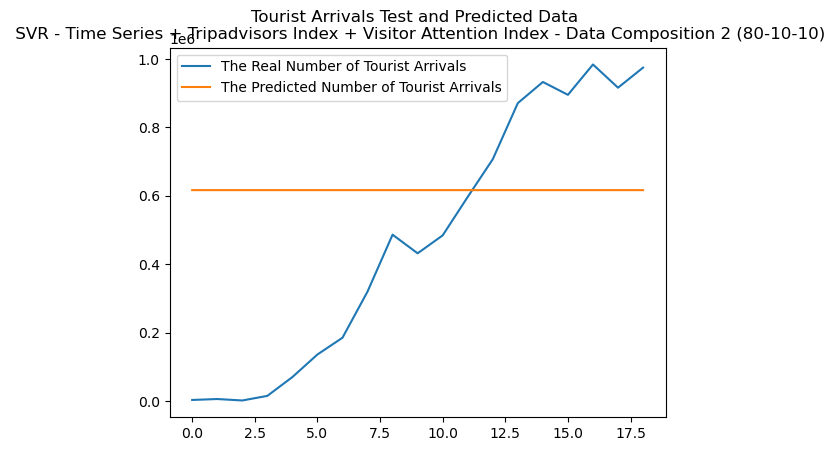

In [24]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="The Real Number of Tourist Arrivals")
plt.plot(x_ax, y_pred, label="The Predicted Number of Tourist Arrivals")
plt.title("Tourist Arrivals Test and Predicted Data \n SVR - Time Series + Tripadvisors Index + Visitor Attention Index - Data Composition 2 (80-10-10)")
plt.legend()
plt.show()